In [86]:
import nltk
from nltk.corpus import stopwords
## https://likegeeks.com/es/tutorial-de-nlp-con-python-nltk/ 30/06/2020 1:45 pm#

In [87]:
import json 
#obtenemos el texto que queremos
with open(r"/home/rodrigo/data1/codigo/python/nltk_1/quote.json") as f:
    data = json.load(f)
print(data)
print(data.keys())
print(data['text'])

{'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', 'author': 'Albert Einstein', 'tags': ['change', 'deep-thoughts', 'thinking', 'world']}
dict_keys(['text', 'author', 'tags'])
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”


# Limpiar el texto de simbolos y mayusculas

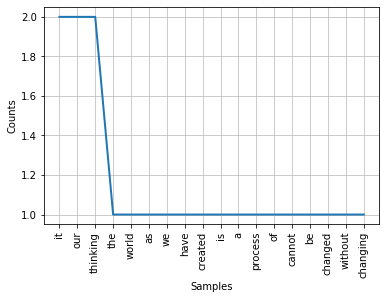

the 1
world 1
as 1
we 1
have 1
created 1
it 2
is 1
a 1
process 1
of 1
our 2
thinking 2
cannot 1
be 1
changed 1
without 1
changing 1


In [88]:
text = data['text']
clean_text = text.replace('”',"").replace('.','').replace('“','')
tokens_1 = [t for t in clean_text.split()]
tokens = [t.lower() for t in tokens_1]
clean_tokens = tokens[:]
freq=nltk.FreqDist(tokens)
freq.plot()
for x in freq:
    print(x,freq[x])

# Limpiar el texto de stopwords


A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine 
has been programmed to ignore, both when indexing entries for searching and when retrieving 
them as the result of a search query.

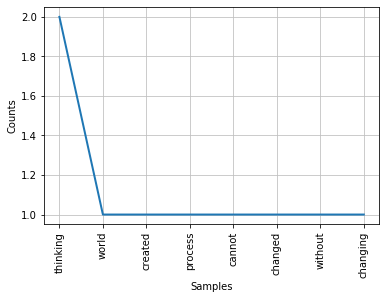

In [89]:
sr= stopwords.words('english')
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)
freq_clean =nltk.FreqDist(clean_tokens)
freq_clean.plot()

# Derivacion Regresiva

In [90]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

print(stemmer.stem('working'))

work


# Lematización


In [91]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('increases'))

increase


In [92]:
stemmed = [ lemmatizer.lemmatize(w) for w in tokens]
stemmed

['the',
 'world',
 'a',
 'we',
 'have',
 'created',
 'it',
 'is',
 'a',
 'process',
 'of',
 'our',
 'thinking',
 'it',
 'cannot',
 'be',
 'changed',
 'without',
 'changing',
 'our',
 'thinking']

## Obtener verbos pronombres, adjetivos y adverbios al lematizar

In [93]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('playing', pos="v"))

print(lemmatizer.lemmatize('playing', pos="n"))

print(lemmatizer.lemmatize('playing', pos="a"))

print(lemmatizer.lemmatize('playing', pos="r"))

play
playing
playing
playing


In [94]:
print(clean_tokens)
lemmatized_nouns_clean = [lemmatizer.lemmatize(t ,pos="n") for t in clean_tokens]
lemmatized_verbs_clean = [lemmatizer.lemmatize(t ,pos="v") for t in clean_tokens]
lemmatized_verbs_clean

['world', 'created', 'process', 'thinking', 'cannot', 'changed', 'without', 'changing', 'thinking']


['world',
 'create',
 'process',
 'think',
 'cannot',
 'change',
 'without',
 'change',
 'think']

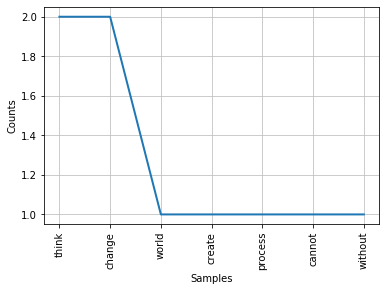

In [95]:
freq_verbs=nltk.FreqDist(lemmatized_verbs_clean)
freq_verbs.plot()
#for x in freq:
#    print(x,freq[x])

# Trabajar con arreglo de jsons


In [99]:

with open(r"/home/rodrigo/data1/codigo/python/nltk_1/quotes.json") as f:
    json_array = json.load(f)
    quotes_list =[]
    for item in json_array:
        quote_details = {"text":None, "author":None, "tags": None}
        quote_details['text'] = item['text']
        quote_details['author'] = item['author']
        quote_details['tags'] = item['tags']
        quotes_list.append(quote_details) 
quotes_list        

[{'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'author': 'Albert Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world']},
 {'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'author': 'J.K. Rowling',
  'tags': ['abilities', 'choices']},
 {'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  'author': 'Albert Einstein',
  'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']},
 {'text': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  'author': 'Jane Austen',
  'tags': ['aliteracy', 'books', 'classic', 'humor']},
 {'text': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  'author': 'Marilyn Monroe',
  'tags': ['be-

## Jsons a dataframe pandas 

In [102]:
import pandas as pd 
df_quotes= pd.DataFrame(quotes_list)

In [103]:
df_quotes.head()

,text,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"


In [111]:
count_author =df_quotes['author'].value_counts()
count_author.head()

Albert Einstein    10
J.K. Rowling        9
Marilyn Monroe      7
Mark Twain          6
Dr. Seuss           6
Name: author, dtype: int64

# Funciones

In [119]:
def clean(text,language ='english'):
     
    clean_text = text.replace('”',"").replace('.','').replace('“','')        
    tokens_1 = [t for t in clean_text.split()]
    tokens = [t.lower() for t in tokens_1]
    clean_tokens = tokens[:]
    sr= stopwords.words(language)
    for token in tokens:
        if token in sr:
            clean_tokens.remove(token)
    return clean_tokens


In [123]:
for quote in quotes_list:
    text = quote['text']
    clean_tokens = clean(text,'english' )
    quote['clean_tokens'] = clean_tokens
    lemmatized_nouns_clean = [lemmatizer.lemmatize(t ,pos="n") for t in clean_tokens]
    lemmatized_verbs_clean = [lemmatizer.lemmatize(t ,pos="v") for t in clean_tokens]
    quote['clean_nouns'] = lemmatized_nouns_clean
    quote['clean_verbs'] = lemmatized_verbs_clean

In [124]:
quotes_list

[{'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'author': 'Albert Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world'],
  'clean_tokens': ['world',
   'created',
   'process',
   'thinking',
   'cannot',
   'changed',
   'without',
   'changing',
   'thinking'],
  'clean_nouns': ['world',
   'created',
   'process',
   'thinking',
   'cannot',
   'changed',
   'without',
   'changing',
   'thinking'],
  'clean_verbs': ['world',
   'create',
   'process',
   'think',
   'cannot',
   'change',
   'without',
   'change',
   'think']},
 {'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'author': 'J.K. Rowling',
  'tags': ['abilities', 'choices'],
  'clean_tokens': ['choices,',
   'harry,',
   'show',
   'truly',
   'are,',
   'far',
   'abilities'],
  'clean_nouns': ['choices,',
   'harry,',
   'show',
   'truly',
   'are,',
   'far',
   'abi